# Abstract
The dataset used in the analysis for wrangling, analyzing and visualizing is the tweet archive of Twitter user @dog_rates,  known as WeRateDogs.  
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog, and invalid funny ratings.

# Import Statements

In [83]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import requests
import numpy as np
import re
import os
from PIL import Image
from io import BytesIO
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Gathering

## The WeRateDogs Twitter archive.  
WeRateDogs Twitter archive, which contains tweet data like tweet ID, timestamp, text, rating, and some other data.  
The archive originally have over 5000 of their tweets.  
This file is downloaded from Udacity server and stored locally as CSV file, it will be read into Dataframe to continue the analysis with its data.

**Reading local file: twitter-archive-enhanced.csv**

In [84]:
df_arc = pd.read_csv('twitter-archive-enhanced.csv')

## The Twitter image predictions.  
The WeRateDogs Twitter archive pictures were used classify breeds of dogs using neural network.  
It created a table full of image predictions alongside each tweet ID, image URL, and the image number used  
This file is hosted on Udacity's servers and will be downloaded programmatically with requests module  

**Request TSV file and read its content**
- Create new file, name is the last part of the url
- Request the url
- Get the request content

In [85]:
url_images = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url_images.split('/')[-1]
response = requests.get(url_images).content

**Saving the TSV file loacally, then loading it into DataFrame**
- Use `with` to open the saved local file
- Write the response content into the opend file
- Read the local file into a DataFrame

In [86]:
with open(file_name, mode='wb') as file:
    file.write(response)
df_images = pd.read_csv(file_name, sep="\t")

## Retweet and favorite JSON data.  
Query the Twitter API for each tweet's JSON data using Tweepy and the tweet ID from the twitter archive.  
Then each tweet's entire set of JSON data is stored as a line in a file called tweet_json.txt file.  
Then this text file is read line by line into a pandas DataFrame tto get tweet ID, retweet count, and favorite count.  

**ON HOLD, waiting Twitter acceptence to the developer account**

In [87]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

**Alt method: Reading local JSON file into a list, each line is an item**
- Create an empty list to save the JSON data in it
- Define what items are needed from the JSON
- Use `With` to open the text file
- Read the opend file line by line
- Create a dictionary from the read line to store the needed data from the JSON
- Add the created dictionary to the empty list created, so we have all the JSON data as dictionary items in the list

In [88]:
json_data = []
json_columns = ['tweet_id', 'retweet_count', 'favorite_count']
json_file_name = 'tweet-json.txt'

with open(json_file_name, mode='r') as f:
    for line in f:
        json_line = json.loads(line)
        json_dic = {'tweet_id': json_line['id'], 'retweet_count': json_line['retweet_count'], 'favorite_count': json_line['favorite_count']}
        json_data.append(json_dic)

**Creating DataFrame for the loaded list of JSON data**

In [89]:
df_json = pd.DataFrame(json_data, columns=json_columns)
df_json.shape

(2354, 3)

# Assessing

Assesing visually and programmatically for quality and tidiness issues.  
The analysis requires only tweets with original ratings, no retweets.  
The quality criteria are: completeness, validity, accuracy and consistency.  
The tidiness critia are: each variable forms a column, each observation forms a row, Each type of observational unit forms a table.

In [90]:
df_arc.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [91]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [92]:
df_arc[df_arc.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [93]:
df_arc.tweet_id.duplicated().sum()

0

In [94]:
df_arc.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
O            1
Zoe          1
Tango        1
Angel        1
Combo        1
Name: name, Length: 957, dtype: int64

In [95]:
df_arc[df_arc['name'].str.len()<=3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
16,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,None,None,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
53,881906580714921986,NaN,NaN,2017-07-03 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [96]:
df_arc[df_arc['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [97]:
df_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [98]:
df_arc.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [99]:
df_arc[df_arc.rating_denominator!=10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


In [100]:
df_arc[df_arc.rating_denominator!=10].shape[0]

23

In [101]:
df_arc.text.iloc[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [102]:
df_arc.duplicated().sum()

0

In [103]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [104]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [105]:
df_images.jpg_url.duplicated().sum()

66

In [106]:
df_images.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True
448,674690135443775488,https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg,1,tick,0.242538,False,nail,0.212589,False,screw,0.172838,False
58,667090893657276420,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg,1,Chihuahua,0.959514,True,Italian_greyhound,0.005370,True,Pomeranian,0.002641,True
633,680970795137544192,https://pbs.twimg.com/media/CXNLU6wWkAE0OkJ.jpg,1,pug,0.713102,True,whippet,0.057426,True,quilt,0.056018,False
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
2053,887705289381826560,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,basset,0.821664,True,redbone,0.087582,True,Weimaraner,0.026236,True
1450,776218204058357768,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,1,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True
355,672594978741354496,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great_Pyrenees,0.755945,True,Old_English_sheepdog,0.082337,True,Afghan_hound,0.027037,True
704,684926975086034944,https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg,1,Labrador_retriever,0.769412,True,golden_retriever,0.144893,True,lion,0.021440,False
1819,834209720923721728,https://pbs.twimg.com/media/C5O1UAaWIAAMBMd.jpg,1,golden_retriever,0.754799,True,Pekinese,0.197861,True,Labrador_retriever,0.008654,True


In [107]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [108]:
df_images.duplicated().sum()

0

In [109]:
df_json.shape[0]

2354

In [110]:
df_arc.shape[0]

2356

In [111]:
df_json.retweet_count.value_counts().sort_values()

274     1
2610    1
561     1
2608    1
4653    1
       ..
516     4
1207    4
83      5
3652    5
1972    5
Name: retweet_count, Length: 1724, dtype: int64

In [112]:
df_json.favorite_count.value_counts().sort_values()

19163      1
1817       1
3864       1
262        1
1813       1
        ... 
2176       3
2768       3
2706       3
1691       3
0        179
Name: favorite_count, Length: 2007, dtype: int64

## Quality Issues
**Twitter local archive: df_arc**  
- `retweeted_status_user_id` are retweets and not needed, `in_reply_to_status_id` are replies and not needed.
- `expanded_urls` not needed for analysis.  
Also, `retweeted_status_user_id`, `retweeted_status_user_id` & `retweeted_status_timestamp` not needed after removing retweets  
And `in_reply_to_status_id`, `in_reply_to_user_id` not needed after removing replies
- `source` include `<a>` tags
- Dog types and `name`columns use `None` instead of `NaN`
- `timestamp` string and not a datetime type
- `rating_numerator` & `rating_denominator` extraction from text are not accurate
- `rating_denominator`not needed if all values are 10
- `rating_numerator` (after previous step) one row doesn't have a value
- `name` has some invalid values
- `in_reply_to_status_id` float type (not applicable - column removed)
- `in_reply_to_user_id` float type (not applicable - column removed)
- `retweeted_status_id` float type (not applicable - column removed)
- `retweeted_status_user_id` float type (not applicable - column removed)
- `expanded_urls` with replies have repeated urls (not applicable - column removed)
    
**Twitter hosted image file: df_images**
-  `p1`, `p1_conf`,	`p1_dog	p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog` not needed for analysis.
- breed columns string have some lower case value and uses _ instead of space

**Twitter API data: df_json**
- Row count is less than the rows in the archive (not applicable - DataFrame merged)

## Tidyness issues
**Twitter local archive: df_arc**  
- last 4 columns are one variable: `dog_stages`
- Some rows are rating for more than 1 dog (not addressed)
- `timestamp` is one column for more than 3 variables (not addressed)

**Twitter hosted image file: df_images**
- 9 Columns for predictions and no column for accepted prediction
- This table results should be part of the archive date

**Twitter API data: df_json**
- This table values should be part of the archive date

# Clean

## Copies of source DataFrame

Create copies of the loaded DataFrames to work on, so any mistakes made only affect the copies

In [113]:
df_arc_clean = df_arc.copy()

In [114]:
df_images_clean = df_images.copy()

In [115]:
df_json_clean = df_json.copy()

## 1. Twitter JSON should not be a separate table (Tidiness)
First major issue to address is that the JSON DataFrame should be part of the archive Dataframe, this will reduce the amount of DataFrame to be analyzed and group related data into one table

**Define**
- Merge df_json_clean into the df_arc_clean
- Keep only tweets which have values in both DataFrames (use `inner` method)
- Resulting DataFrame should have 2354 entries (the smaller of the 2 frames)

In [116]:
df_arc_clean.shape[0]

2356

In [117]:
df_json_clean.shape[0]

2354

**Code**

In [118]:
df_arc_clean = pd.merge(left=df_arc_clean, right=df_json_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

**Test**

In [119]:
df_arc_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819


In [120]:
df_arc_clean.shape[0]

2354

## 2. No column for accepted prediction in images table (Tidiness)
Before we merge the image prediction table into the twitter archive table, there's a more critical issue.  
The prediction table has too much columns from the neural network output that we won't need in the analysis, and what will be needed for the analysis is the final accepted prediction which is not defined by a column

**Define**
- Create empty list for the new columns `breeds[]` and `conf[]`
- Create a function to select the highest confidence from p1, p2, & p3
- populate the empty lists with the selected confidence from the function
- Create a new column in the DataFrame for the accepted `breed` and `breed_conf`
- Fill in the new columns with the lists

**Code**

In [121]:
breeds = []
conf = []
def prediction (df):
    if df.p1_dog:
        breeds.append(df.p1)
        conf.append(df.p1_conf)
    elif df.p2_dog:
        breeds.append(df.p2)
        conf.append(df.p2_conf)
    elif df.p3_dog:
        breeds.append(df.p3)
        conf.append(df.p3_conf)
    else:
        breeds.append(np.nan)
        conf.append(np.nan)

In [122]:
df_images_clean.apply(prediction, axis=1)
df_images_clean['breed'] = breeds
df_images_clean['prediction_conf'] = conf

**Test**

In [123]:
df_images_clean.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,prediction_conf
578,678755239630127104,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,1,malamute,0.606654,True,Border_collie,0.193831,True,collie,0.048378,True,malamute,0.606654
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True,Border_collie,0.894842
259,670782429121134593,https://pbs.twimg.com/media/CU8ZDu9WwAADg3N.jpg,1,Chihuahua,0.952963,True,French_bulldog,0.036575,True,Boston_bull,0.001977,True,Chihuahua,0.952963
782,690005060500217858,https://pbs.twimg.com/media/CZNj8N-WQAMXASZ.jpg,1,Samoyed,0.270287,True,Great_Pyrenees,0.114027,True,teddy,0.072475,False,Samoyed,0.270287
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.355060,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.099884,True,Border_terrier,0.355060
191,669564461267722241,https://pbs.twimg.com/media/CUrFUvDVAAA9H-F.jpg,1,toy_poodle,0.623685,True,miniature_poodle,0.259920,True,standard_poodle,0.082530,True,toy_poodle,0.623685
1653,809920764300447744,https://pbs.twimg.com/media/Cz1qo05XUAQ4qXp.jpg,1,Norwich_terrier,0.397163,True,toy_poodle,0.274540,True,miniature_poodle,0.134667,True,Norwich_terrier,0.397163
86,667517642048163840,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,Italian_greyhound,0.125176,True,standard_poodle,0.084572,True,cocker_spaniel,0.081347,True,Italian_greyhound,0.125176
140,668544745690562560,https://pbs.twimg.com/media/CUcl5jeWsAA6ufS.jpg,1,bearskin,0.427870,False,bow,0.258858,False,panpipe,0.021563,False,NaN,NaN
1771,827653905312006145,https://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg,1,collie,0.285555,True,Border_collie,0.217306,True,Saint_Bernard,0.143245,True,collie,0.285555


## 3. `p1`, `p1_conf`,... not needed for analysis. (Quality)
After creating a column for the accepted prediction, the previous prediction columns are not needed and are increasing the DataFrame size with no real use.  
This is addressed before merging the predictions into the archive, to not megre unnecessary data

**Define**
- After creating a column for the prediction results, the 9 prediction columns are not needed
- Drop `p1`, `p1_conf`,	`p1_dog	p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog`
- Drop `img_num`, it not usefull

**Code**

In [124]:
to_remove_2 = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_images_clean.drop(to_remove_2, axis=1, inplace=True)

**Test**

In [125]:
df_images_clean.head(2)

,tweet_id,jpg_url,breed,prediction_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826


## 4. Images table should be part of the Archive (Tidiness)
After cleaning the prediction table, the other major tidiness issue can be solved by merging the prediction DataFrame into the archive Dataframe.


**Define**
- Merge the df_images_clean into the df_arc_clean
- use all data in the archive

**Code**

In [126]:
df_arc_clean = pd.merge(left=df_arc_clean, right=df_images_clean, left_on='tweet_id', right_on='tweet_id', how='left')

**Test**

In [127]:
df_arc_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,breed,prediction_conf
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,None,None,None,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012


## 5. None is used instead of NaN (Quality)
After merging the 3 DataFrame into one, the most obvious quality issue is that alot of cells have `None` as value in it, this is clear validy issue and will affect the analysis. it's present all across the DataFrame and in most columns.

**Define**
- Replace `None` with `np.nan` in all columns

**Code**

In [128]:
df_arc_clean.replace('None', np.nan, inplace=True)

**Test**

In [129]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        1610 non-null   object 
 13  doggo                       97 no

## 6. Dog stage is on 4 columns (Tidiness)
The extracted dog stage are filled in 4 different columns, with the columns having the same names as the dog stage values.  
These are 4 dog stage columns for only one variable.
This is addressed after replacing the strings `None` with empty value, so it's easier to concatenate the 4 columns together.
After concatenating the 4 column strings, the old stage columns will be droped.  
Some values are found to have more than one dog stage, this is due to having more than one dog in the tweet, these rows should be split into multiple rows, but the number is so few that it won't affect the analysis so their values will be left blank.

**Define**
- Creat a new column for the dog stages
- Concatenate the 4 stages strings into the new column with the `na` as blank string
- replace the blank string with `np.nan` again
- Drop the 4 stages columns
- Replace rows which have more than 1 dog_stage value to `np.nan` (this is mutiple dogs)

In [130]:
df_arc_clean['dog_stage'] = (df_arc_clean.doggo.fillna('') 
                            + df_arc_clean.floofer.fillna('') 
                            + df_arc_clean.pupper.fillna('') 
                            + df_arc_clean.puppo.fillna('')).replace('',np.nan)

In [131]:
df_arc_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [132]:
df_arc_clean.at[df_arc_clean.dog_stage.str.len()>7, 'dog_stage'] = np.nan

**Test**

In [133]:
df_arc_clean.dog_stage.value_counts()

pupper     244
doggo       83
puppo       29
floofer      9
Name: dog_stage, dtype: int64

In [134]:
df_arc_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,breed,prediction_conf,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,NaN


## 7. `retweeted_status_user_id` are retweets and not needed (Quality)
Retweets are misleading data as it's not original to the WeRateDog account, and the analysis is only concerned with that account. So, every retweet will be droped from the dataFrame.  
Retweets have values in the `retweeted_status_user_id` columns, so every `NaN` value in that column is not a retweet and will be kept.

**Define**
- Keep any row with no value in the `retweeted_status_user_id`
- Resulting DataFrame should have 2175 rows

In [135]:
len(df_arc_clean[df_arc_clean['retweeted_status_user_id'].isna()])

2175

**Code**

In [136]:
df_arc_clean = df_arc_clean[df_arc_clean['retweeted_status_user_id'].isna()]

**Test**

In [137]:
len(df_arc_clean['retweeted_status_user_id'])

2175

## 8. `in_reply_to_status_id` are replies and not needed (Quality)
Replies are original to the WeRateDogs account, but some of them dont are not for dog rating.  
Cleaning this will have to be done manually, the other solution is to drop the replies.  
All the replies have values in `in_reply_to_status_id`, so any `NaN` value in that column is not a reply

**Define**
- Keep rows with `NaN` in the `in_reply_to_status_id` column
- Resulting Dataframe should be 2097 rows

In [138]:
len(df_arc_clean[df_arc_clean['in_reply_to_status_id'].isna()])

2097

**Code**

In [139]:
df_arc_clean = df_arc_clean[df_arc_clean['in_reply_to_status_id'].isna()]

**Test**

In [140]:
df_arc_clean.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [141]:
df_arc_clean.shape[0]

2097

## 9. Remove extra columns from Twitter Archive (Quality)
After removing retweets and replies, all their related columns are not needed in the Dataframe. Also, the source column is not unnecessary to the analysis.

**Define**
- Drop `source`, `in_reply_to_status_id`,          `in_reply_to_user_id`,          `retweeted_status_id`,          `retweeted_status_user_id`,          `retweeted_status_timestamp`

**Code**

In [142]:
remove_columns = ['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_arc_clean.drop(remove_columns, axis=1, inplace=True)

**Test**

In [143]:
df_arc_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,breed,prediction_conf,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,NaN


## 10. `timestamp` are string (Quality)
Time in the `timestamp` is stored as string, which is not practical for extracting data.  
Also, the string has `+0000` in the value which is not usefull and should be removed

**Define**
- Remove +0000 from the values, the last 5 characters in the sting
- Convert string to timedate

**Code**

In [144]:
df_arc_clean.timestamp = df_arc_clean.timestamp.str[:-6]

In [145]:
df_arc_clean.timestamp = pd.to_datetime(df_arc_clean['timestamp'])

**Test**

In [146]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   rating_numerator    2097 non-null   int64         
 4   rating_denominator  2097 non-null   int64         
 5   name                1494 non-null   object        
 6   retweet_count       2097 non-null   int64         
 7   favorite_count      2097 non-null   int64         
 8   jpg_url             1971 non-null   object        
 9   breed               1666 non-null   object        
 10  prediction_conf     1666 non-null   float64       
 11  dog_stage           325 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 213.0+ KB


## 11. `rating_numerator` & `rating_denominator` not accurate (Quality)
The WeRateDogs account is known for their invalid rating of dogs, the account use numerical rating out of 10 points but with a numerator larger than 10.  
The problem is that some rating is not out of 10, this is mostly because it's a rating for a group of dogs. This can be modified to 10 point system with simple calculations  
Also, some are extracted wrong from the text, as they should have been floats with decimals and not integers  
This requires a lot of code to programmatically corrected, it's a lot easier to beed done manually by calling the index of the wrong ratings and changing the rating columns.

**Define**
- Create a new DataFrame to hold the rows to be modified
- Add `rating_denominator` not equal 10 from the archive DataFrame to new DataFrame
- Assess `rating_numerator` which are extracted from the decimals only and append to the new DataFrame
- Assess every single item from its text, some are extracted wrong, some are mutiple dogs, some doesn't have rating
- Modify manually the `rating_numerator`
- Drop `rating_denominator` columns, as it's all `10` after correcting the values

In [147]:
df_arc_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [148]:
df_arc_clean[df_arc_clean.rating_numerator==75]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,breed,prediction_conf,dog_stage
694,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,NaN


In [149]:
df_arc_clean[df_arc_clean.rating_numerator==26]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,breed,prediction_conf,dog_stage
1710,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,26,10,NaN,542,1879,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,NaN


In [150]:
df_arc_clean[df_arc_clean.rating_numerator==27]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,breed,prediction_conf,dog_stage
762,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,1885,7320,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,pupper


**Code**

In [151]:
df_wrong = df_arc_clean[df_arc_clean.rating_denominator != 10]

In [152]:
df_wrong = df_wrong.append(df_arc_clean[df_arc_clean.rating_numerator==27])
df_wrong = df_wrong.append(df_arc_clean[df_arc_clean.rating_numerator==26])
df_wrong = df_wrong.append(df_arc_clean[df_arc_clean.rating_numerator==75])

In [153]:
text_list = df_wrong.text.values
id_list = df_wrong.index.values
count = len(id_list)

In [154]:
for i in range(count):
    print ('{}: {}'.format(id_list[i], text_list[i]))

432: The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
515: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
900: Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1066: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1118: Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1163: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1200: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1226: Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1252: Here's a brigade of puppers. All look very prepared for whatev

In [155]:
df_arc_clean.at[432, 'rating_numerator'] = (84/70)*10
df_arc_clean.at[515, 'rating_numerator'] = 0
df_arc_clean.at[900, 'rating_numerator'] = (165/150)*10
df_arc_clean.at[1066, 'rating_numerator'] = 14
df_arc_clean.at[1118, 'rating_numerator'] = (204/170)*10
df_arc_clean.at[1163, 'rating_numerator'] = 13
df_arc_clean.at[1200, 'rating_numerator'] = 11
df_arc_clean.at[1226, 'rating_numerator'] = (99/90)*10
df_arc_clean.at[1252, 'rating_numerator'] = (80/80)*10
df_arc_clean.at[1272, 'rating_numerator'] = (45/50)*10
df_arc_clean.at[1349, 'rating_numerator'] = (60/50)*10
df_arc_clean.at[1431, 'rating_numerator'] = (44/40)*10
df_arc_clean.at[1633, 'rating_numerator'] = (121/110)*10
df_arc_clean.at[1660, 'rating_numerator'] = 10
df_arc_clean.at[1777, 'rating_numerator'] = (144/120)*10
df_arc_clean.at[1841, 'rating_numerator'] = (88/80)*10
df_arc_clean.at[2333, 'rating_numerator'] = 9
df_arc_clean.at[762, 'rating_numerator'] = 11
df_arc_clean.at[1710, 'rating_numerator'] = 11
df_arc_clean.at[694, 'rating_numerator'] = 10

In [156]:
df_arc_clean.drop('rating_denominator', axis=1, inplace=True)

**Test**

In [157]:
df_arc_clean[df_arc_clean.rating_numerator==26]

,tweet_id,timestamp,text,rating_numerator,name,retweet_count,favorite_count,jpg_url,breed,prediction_conf,dog_stage


## 12. `rating_numerator` with no value (Quality)
One tweet didn't have a valid rating in the text, this was discovered while cleaning from previous step.  
This can be safely put as the mean value of the `rating_numerator`

**Define**
- Text with no valid rating (`0` from last step)
- Fill 1 value with mean value
- Leave 1 row as 0, it's rated 0 correctly

In [158]:
df_arc_clean[df_arc_clean.rating_numerator == 0]

,tweet_id,timestamp,text,rating_numerator,name,retweet_count,favorite_count,jpg_url,breed,prediction_conf,dog_stage
314,835152434251116546,2017-02-24 15:40:31,When you're so blinded by your systematic plag...,0,NaN,3443,24574,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,American_Staffordshire_terrier,0.012731,NaN
515,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,0,Sam,1655,5927,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,NaN


In [159]:
df_arc_clean.loc[314].text

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [160]:
df_arc_clean.loc[515].text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

**Code**

In [161]:
df_arc_clean.at[515, 'rating_numerator'] = df_arc_clean.rating_numerator.mean()

**Test**

In [162]:
df_arc_clean.loc[515]

tweet_id                                           810984652412424192
timestamp                                         2016-12-19 23:06:23
text                Meet Sam. She smiles 24/7 &amp; secretly aspir...
rating_numerator                                                   11
name                                                              Sam
retweet_count                                                    1655
favorite_count                                                   5927
jpg_url               https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
breed                                                golden_retriever
prediction_conf                                              0.871342
dog_stage                                                         NaN
Name: 515, dtype: object

## 13. `breed` column names are wrongly capitalized (Quality)
Breed prediction table had the dog breed names with `_` and some with lower case, this was merged into the twitter archive previously.  
Breed is a noune and should be capitalised and it can have empty spaces safely as it's saved as string

**Define**
- Remove all `_` and replace with empty space
- capitalize each word 

**Code**

In [164]:
df_arc_clean.breed = df_arc_clean.breed.str.replace('_', ' ').str.title()

**Test**

In [165]:
df_arc_clean.sample(20)

,tweet_id,timestamp,text,rating_numerator,name,retweet_count,favorite_count,jpg_url,breed,prediction_conf,dog_stage
995,748324050481647620,2016-06-30 01:15:31,This is Duke. He permanently looks like he jus...,11,Duke,867,4078,https://pbs.twimg.com/media/CmKUwImXIAA58f5.jpg,Shetland Sheepdog,0.880499,NaN
2059,671166507850801152,2015-11-30 03:18:59,This is Herm. It's his first day of potty trai...,10,Herm,390,931,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,NaN,NaN,NaN
1058,741438259667034112,2016-06-11 01:13:51,This is Tucker. He's still figuring out couche...,9,Tucker,937,4026,https://pbs.twimg.com/media/CkoeKTPWYAAcWmo.jpg,Chesapeake Bay Retriever,0.292675,NaN
742,780459368902959104,2016-09-26 17:29:48,"This is Bear. Don't worry, he's not a real bea...",11,Bear,1224,5892,https://pbs.twimg.com/media/CtS_p9kXEAE2nh8.jpg,Great Dane,0.382491,NaN
415,822610361945911296,2017-01-21 01:02:48,Please stop sending in non-canines like this V...,12,NaN,3423,16327,https://pbs.twimg.com/media/C2p_wQyXEAELtvS.jpg,Cocker Spaniel,0.664487,NaN
745,780074436359819264,2016-09-25 16:00:13,Here's a doggo questioning his entire existenc...,10,NaN,5815,13723,NaN,NaN,NaN,doggo
1413,698703483621523456,2016-02-14 03:01:06,This is Rusty. He has no respect for POULTRY p...,7,Rusty,425,1608,https://pbs.twimg.com/media/CbJLG0HWwAAV-ug.jpg,Brittany Spaniel,0.931963,NaN
436,820078625395449857,2017-01-14 01:22:35,I've never wanted to go to a camp more in my e...,12,NaN,7246,21979,https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg,NaN,NaN,NaN
2200,668643542311546881,2015-11-23 04:13:37,Fascinating dog here. Loves beach. Oddly long ...,3,NaN,576,939,https://pbs.twimg.com/media/CUd_wYRWUAAZsKr.jpg,NaN,NaN,NaN
1341,704761120771465216,2016-03-01 20:11:59,This pupper killed this great white in an epic...,13,NaN,3257,7283,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,Chihuahua,0.100418,pupper


## 14. `name` has invalid names (Quality)
Some Dog names are extracted wrong from the text, this is easliy identified because they all have lower case names.  
All these names will be replaced to `NaN` as it's not neccessary for the analysis to have the dog names.

**Define**
- Select `notna` and all lower case from the column `name`
- Replace all wrong names with `np.nan`

In [166]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2097 non-null   int64         
 1   timestamp         2097 non-null   datetime64[ns]
 2   text              2097 non-null   object        
 3   rating_numerator  2097 non-null   int64         
 4   name              1494 non-null   object        
 5   retweet_count     2097 non-null   int64         
 6   favorite_count    2097 non-null   int64         
 7   jpg_url           1971 non-null   object        
 8   breed             1666 non-null   object        
 9   prediction_conf   1666 non-null   float64       
 10  dog_stage         325 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 276.6+ KB


**Code**

In [167]:
df_arc_clean.at[df_arc_clean.name.notna() & df_arc_clean.name.str.islower(), 'name'] = np.nan

**Test**

In [168]:
df_arc_clean[df_arc_clean.name.notna() & df_arc_clean.name.str.islower()]

,tweet_id,timestamp,text,rating_numerator,name,retweet_count,favorite_count,jpg_url,breed,prediction_conf,dog_stage


# Saving
Storing the cleaned DataFrame to a local CSV file.

In [169]:
df_arc_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

**Test**

In [170]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [171]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2097 non-null   int64  
 1   timestamp         2097 non-null   object 
 2   text              2097 non-null   object 
 3   rating_numerator  2097 non-null   int64  
 4   name              1390 non-null   object 
 5   retweet_count     2097 non-null   int64  
 6   favorite_count    2097 non-null   int64  
 7   jpg_url           1971 non-null   object 
 8   breed             1666 non-null   object 
 9   prediction_conf   1666 non-null   float64
 10  dog_stage         325 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 180.3+ KB


# Analysis and Visualizing 

Cleaned Data will be used to find answers to some questions:
1. What's the most tweeted dog stage and what's the least
2. What are the average retweet and favorite count per dog breed
3. Does tweet timing affect the retweets
4. Does rating affect the favorite or retweet count
5. Are there is any breeds easier to predict than other

## What's The Most Tweeted Dog Stage
- Extract stages values in a list
- Extract the relative count for each stage in a list
- Create Piechart for the 2 lists with the percent labeled

In [172]:
dog_stages = twitter_archive_master.dog_stage.value_counts().index.str.title()
stages_values = twitter_archive_master.dog_stage.value_counts().values

In [173]:
def pie_value(val):
    return int(val)

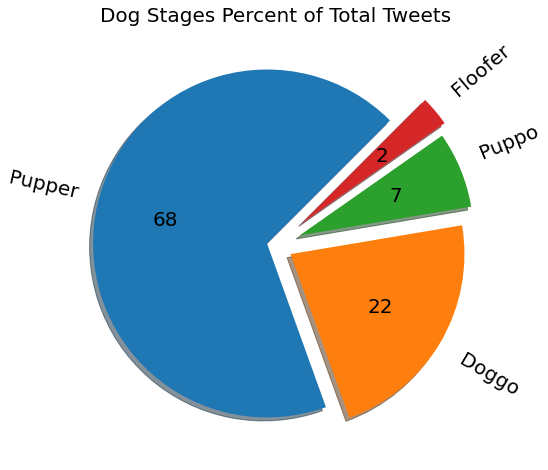

In [198]:
plt.figure(figsize=(8,8))
plt.pie(stages_values, labels=dog_stages,  explode = (0.05, 0.1, 0.15, 0.2),
        autopct=pie_value, shadow=True, startangle=45, rotatelabels=True, textprops={'fontsize': 20})
plt.title('Dog Stages Percent of Total Tweets').set_fontsize(20)
plt.show()

### Analysis
- The Majority of the WeRateDogs tweets are puppers, around 68% of their posts.
- Floofers are really rare with only 2%.

## What are the average retweet and favorite count per dog breed
- Create a Dataframe for the grouped breed means
- Sort by favorite count
- Select the top and lowest 5 breeds
- Plot horizontal bar chart for tweet and favorite count for each breed

In [175]:
groupedby_breed = twitter_archive_master.groupby('breed')

In [176]:
fav_group_mean = groupedby_breed.mean().reset_index()
df_fav = pd.DataFrame(fav_group_mean, columns=['breed', 'retweet_count', 'favorite_count'])

In [177]:
select = [-1, -2, -3, -4, -5, 4, 3, 2, 1, 0]
df_fav = df_fav.sort_values('favorite_count').iloc[select]

In [178]:
breed_values = df_fav['breed']
x_fav = df_fav['favorite_count']
x_ret = df_fav['retweet_count']

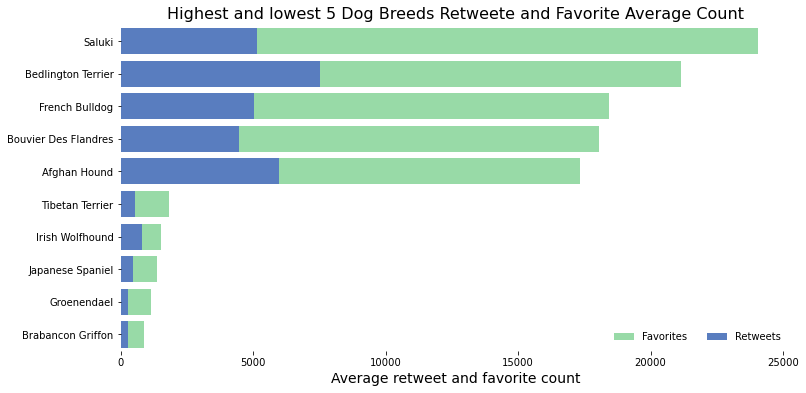

In [179]:
f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("pastel")
sns.barplot(x=x_fav, y=breed_values, label="Favorites", color="g")

sns.set_color_codes("muted")
sns.barplot(x=x_ret, y=breed_values, label="Retweets", color="b")

plt.legend(ncol=2, loc="lower right", frameon=False)
plt.xlabel('Average retweet and favorite count', size=14)
plt.ylabel('')
plt.title('Highest and lowest 5 Dog Breeds Retweete and Favorite Average Count', size=16)
plt.box(False)
plt.show()

**Analysis**  

On average / Tweet
- Saluki dogs are more likely to generate favorites more than other breeds, with average 24060 favorites per tweet
- But the Bedlington Terrier are more likely to be retweeted
- The least favored and retweeted dog is the Brabancon Griffon, generating on average 885 favorites for each tweet

## Does tweet timing affect the retweets
- Create DataFrame with timestamp and retweet count only
- Extract hour from the timestamp
- Group DataFrame by hour
- Calculate the mean retweet count for each hour group

In [217]:
df_time = twitter_archive_master.copy()
df_time.drop(['breed','prediction_conf','jpg_url','tweet_id', 
              'text', 'rating_numerator', 'name', 
              'favorite_count', 'dog_stage'], axis=1, inplace=True)

In [218]:
df_time.timestamp = pd.to_datetime(df_time['timestamp'])
df_time['hour'] = df_time.timestamp.dt.hour
df_time.drop(['timestamp'], axis=1, inplace=True)

In [219]:
df_time.groupby('hour').sum().sort_values('retweet_count')

,retweet_count
hour,
13,7991
14,13789
5,43724
6,70507
4,132694
22,196106
21,198568
20,249720
19,256033


In [221]:
df_time = df_time.groupby('hour').mean().reset_index()

In [222]:
df_time['%'] = (df_time.retweet_count / df_time.retweet_count.sum())*100

In [223]:
df_time.sort_values('%')

,hour,retweet_count,%
4,4,1340.343434,2.081917
8,14,1532.111111,2.379784
5,5,1619.407407,2.515379
3,3,1621.067039,2.517957
2,2,1908.403587,2.964268
1,1,2588.816609,4.021134
11,17,2638.494118,4.098297
16,22,2686.383562,4.172682
15,21,2720.109589,4.225068
14,20,2937.882353,4.563328


**Analysis**
- On average retweet per tweet, more than 27% of the retweets are done for tweets posted on 6 O'clock
- Rest of the day, no strong relation can be found between the tweet hour and the retweets count. 

## Does rating affect the favorite or retweet count

In [186]:
df_no_outliers = twitter_archive_master.copy()

In [187]:
df_no_outliers.rating_numerator.value_counts()

12      490
10      439
11      422
13      288
9       154
8        98
7        51
14       39
5        34
6        32
3        19
4        15
2         9
1         4
420       1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [188]:
df_no_outliers.drop([770, 1821], axis=0, inplace=True)

In [189]:
y_values = df_no_outliers['rating_numerator']
x_1 = df_no_outliers.favorite_count
x_2 = df_no_outliers.retweet_count

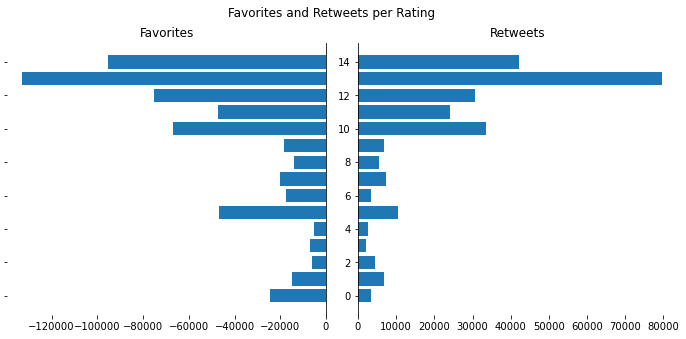

In [190]:
fig, axes = plt.subplots(1, 2,  figsize=(12,5), gridspec_kw={'wspace': 0.1})
#sharey=True,
fig.suptitle('Favorites and Retweets per Rating')

axes[0].barh(y_values, -x_1)
axes[0].set_title('Favorites')
axes[0].spines["top"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["bottom"].set_visible(False)
axes[0].set_yticklabels([])


axes[1].barh(y_values, x_2)
axes[1].set_title('Retweets')
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["bottom"].set_visible(False)

**Analysis**
- Hight rating clearly affect the popularity of the tweets
- High rated dogs are retweeted more and favored more than low rated dogs

## Are there is any breeds easier to predict than other
- 

In [191]:
df_pred = twitter_archive_master.copy()
df_pred.drop(df_pred.columns.drop(['prediction_conf', 'breed']), axis=1, inplace=True)
df_pred.dropna(inplace=True)
df_pred.reset_index(drop=True, inplace=True)

In [192]:
df_pre_g = pd.merge(left=df_pred.groupby('breed').count().reset_index(),
                    right=df_pred.groupby('breed').mean().reset_index(),
                    left_on='breed', right_on='breed', how='inner')
df_pre_g.rename({'prediction_conf_x': 'Count', 'breed': 'Breed', 'prediction_conf_y': 'Mean'}, axis=1, inplace=True)
df_pre_g['Mean'] = df_pre_g['Mean']*100
df_pre_g = df_pre_g.astype({'Mean': int})

In [193]:
df_pre_g.sort_values('Mean', ascending=False).iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]

,Breed,Count,Mean
60,Komondor,3,97
29,Clumber,1,94
58,Keeshond,4,84
23,Bull Mastiff,5,81
22,Brittany Spaniel,8,77
24,Cairn,3,26
76,Norwich Terrier,5,24
91,Scottish Deerhound,4,14
18,Bouvier Des Flandres,1,8
55,Irish Wolfhound,1,6


In [194]:
df_pre_g.sort_values('Count', ascending=False).iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]

,Breed,Count,Mean
45,Golden Retriever,156,65
62,Labrador Retriever,106,59
80,Pembroke,94,68
27,Chihuahua,90,52
82,Pug,62,66
18,Bouvier Des Flandres,1,8
99,Standard Schnauzer,1,44
29,Clumber,1,94
95,Silky Terrier,1,32
38,Entlebucher,1,52


**Analysis**
- Prediction confidence vary greatly between dog breed
- After inspecting the Irish Wolfhound (lowest confidence), this is not a dog picture. So, all breeds with small sample size are droped to increase the prediction quality level
- Easiest dog to identify(>80% confidencce) is the Bull Mastiff
- Hardest to identify (24% Confidence) is the Norwich Terrier

In [224]:
twitter_archive_master[twitter_archive_master.breed=='Irish Wolfhound'].jpg_url

1784    https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg
Name: jpg_url, dtype: object

![Image of Wolfhound](https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg)

In [225]:
twitter_archive_master[twitter_archive_master.breed=='Irish Wolfhound'].text

1784    This is Oscar. He's ready for Christmas. 11/10...
Name: text, dtype: object

In [232]:
# drop all count<3, too small sample population
df_pre_g[df_pre_g.Count>=5].sort_values('Mean', ascending=False).iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]

,Breed,Count,Mean
23,Bull Mastiff,5,81
22,Brittany Spaniel,8,77
9,Bernese Mountain Dog,11,76
88,Samoyed,42,71
81,Pomeranian,41,69
69,Mexican Hairless,7,30
8,Bedlington Terrier,6,28
74,Norfolk Terrier,6,27
98,Standard Poodle,11,27
76,Norwich Terrier,5,24


In [234]:
twitter_archive_master[twitter_archive_master.breed=='Bull Mastiff'].jpg_url

121     https://pbs.twimg.com/media/C_6JrWZVwAAHhCD.jpg
394     https://pbs.twimg.com/media/C0eUHfWUAAANEYr.jpg
827     https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg
1597    https://pbs.twimg.com/media/CWHzzFGXIAA0Y_H.jpg
1703    https://pbs.twimg.com/media/CVlOy3pW4AQ9H1K.jpg
Name: jpg_url, dtype: object

**Easiest Dog to recognize**
![Image of Dog](https://pbs.twimg.com/media/C0eUHfWUAAANEYr.jpg)

In [228]:
twitter_archive_master[twitter_archive_master.breed=='Norwich Terrier'].jpg_url

224     https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg
408     https://pbs.twimg.com/media/Cz1qo05XUAQ4qXp.jpg
1073    https://pbs.twimg.com/media/CdO-6x5W8AENSBJ.jpg
1358    https://pbs.twimg.com/media/CYeWlh0WAAADhsj.jpg
1847    https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg
Name: jpg_url, dtype: object

**Easiest Dog to recognize**
![Image of Dog](https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg)